In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import htwt
from numpy.linalg import eig, det

In [6]:
X, y = htwt.get()
X = X[y == 1]

In [25]:
x_bar = np.mean(X, axis = 0)
Sigma = np.cov(X, ddof = 0, rowvar = False)

In [26]:
lmbda, U = eig(Sigma)

In [28]:
det(U)

1.0

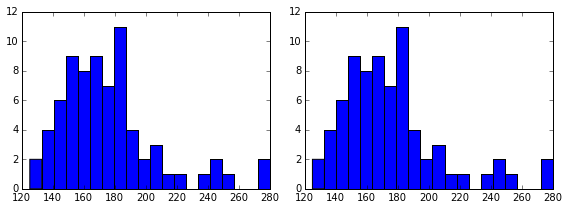

In [31]:
plt.figure(figsize = (8, 3))
plt.subplot(1, 2, 1)
plt.hist(X[:, 1], bins = 20)
plt.subplot(1, 2, 2)
plt.hist(X[:, 1], bins = 20)
plt.tight_layout()
plt.show()